In [19]:
import json
import matplotlib.pyplot as plt
import numpy as np
from qhchina import load_fonts
load_fonts()

def visualize_pattern_perplexity(pattern, 
                                 viz_start, 
                                 viz_end, 
                                 start_rgb, 
                                 end_rgb, 
                                 width_inches=14,
                                 savefig_path=None):
    """
    Visualize perplexity data for a pattern across multiple epochs.
    
    Args:
        pattern: Pattern dictionary from the analysis data
        viz_start: Start index for visualization range
        viz_end: End index for visualization range
        start_rgb: RGB tuple for start color (r, g, b)
        end_rgb: RGB tuple for end color (r, g, b)
        width_inches: Width of the figure in inches
    """
    
    # Extract perplexity data for each epoch
    epoch_perplexities = {}
    epoch_data = pattern['full_document_epoch_data']
    available_epochs = sorted(epoch_data.keys(), key=lambda x: int(x))

    for epoch in available_epochs:
        epoch_tokens_data = epoch_data[epoch]
        # Extract perplexities from token data tuples (token, token_id, perplexity)
        perplexities = []
        for i in range(viz_start, viz_end):
            if i < len(epoch_tokens_data):
                _, _, perplexity = epoch_tokens_data[i]
                perplexities.append(perplexity)
        epoch_perplexities[int(epoch)] = perplexities

    # Extract tokens for the visualization range
    tokens = pattern['full_document_tokens'][viz_start:viz_end]
    epoch_numbers = [int(e) for e in available_epochs]

    # Color gradient function
    def generate_color_gradient(n_colors, start_rgb, end_rgb):
        if n_colors <= 1:
            return [start_rgb]
        colors = []
        for i in range(n_colors):
            ratio = i / (n_colors - 1)
            r = start_rgb[0] + (end_rgb[0] - start_rgb[0]) * ratio
            g = start_rgb[1] + (end_rgb[1] - start_rgb[1]) * ratio
            b = start_rgb[2] + (end_rgb[2] - start_rgb[2]) * ratio
            colors.append((r, g, b))
        return colors

    # Format epoch names
    def format_epoch_name(epoch_num):
        if epoch_num == -1:
            return "Base"
        else:
            return f"Epoch {epoch_num + 1}"

    # Create the plot
    fig, ax = plt.subplots(figsize=(width_inches, 4.8), dpi=300)

    # Generate colors
    colors = generate_color_gradient(len(epoch_numbers), start_rgb, end_rgb)

    # Plot each epoch
    for i, epoch_num in enumerate(epoch_numbers):
        if epoch_num in epoch_perplexities:
            perplexities = epoch_perplexities[epoch_num]
            x_positions = list(range(len(perplexities)))
            ax.plot(x_positions, perplexities, 
                   color=colors[i], linewidth=2, marker='o', markersize=3.8,
                   alpha=0.49, label=format_epoch_name(epoch_num))

    # Set up axes
    data_length = len(tokens)
    x_range = [-1, data_length]
    ax.set_xlim(x_range)
    ax.set_xlabel("Character Sequence", fontsize=14, fontweight='bold')

    # Set x-axis ticks to show tokens
    if tokens:
        ax.set_xticks(list(range(data_length)))
        ax.set_xticklabels(tokens, rotation=0, fontsize=12)

    # Secondary x-axis for token positions
    ax2 = ax.twiny()
    if data_length > 0:
        token_labels = [1] + [5 * i for i in range(1, (data_length // 5) + 2) if 5 * i <= data_length]
        token_tick_vals = [label - 1 for label in token_labels if label - 1 < data_length]
        token_tick_labels = [str(label) for label in token_labels if label - 1 < data_length]
    else:
        token_tick_vals = [0, 4, 9, 14, 19]
        token_tick_labels = ["1", "5", "10", "15", "20"]

    ax2.set_xlim(x_range)
    ax2.set_xticks(token_tick_vals)
    ax2.set_xticklabels(token_tick_labels, fontsize=12)
    ax2.set_xlabel("Token Position", fontsize=14, fontweight='bold')

    # Y-axis setup
    all_perps = []
    for perps in epoch_perplexities.values():
        all_perps.extend(perps)

    if all_perps:
        ax.set_yscale('log')
        ax.set_ylabel("Perplexity (Log Scale)", fontsize=14, fontweight='bold')
        if min(all_perps) > 0 and max(all_perps) > 0:
            y_min = min(all_perps)
            y_max = max(all_perps) * 3
            ax.set_ylim([y_min, y_max])
    else:
        ax.set_ylabel("Perplexity", fontsize=14, fontweight='bold')
        if all_perps and min(all_perps) >= 0:
            y_min = min(all_perps)
            y_max = max(all_perps) * 1.2
            ax.set_ylim([y_min, y_max])

    # Grid and legend
    ax.grid(True, alpha=0.30, linewidth=1)
    legend = ax.legend(loc='upper right', 
                      fontsize=12, frameon=True, facecolor="white", 
                      edgecolor="black", framealpha=0.7)

    if legend.get_frame():
        legend.get_frame().set_linewidth(1)

    plt.tight_layout(pad=2.0)

    # Background color
    face_color = 'white'
    bg_color_setting = 'White'
    if bg_color_setting == "Light Gray":
        face_color = '#f8f9fa'
    elif bg_color_setting == "Transparent":
        face_color = 'none'

    # Save or show the plot
    if savefig_path is not None:
        plt.savefig(savefig_path, format='png', dpi=300, 
                    bbox_inches='tight', facecolor=face_color, edgecolor='none')
    plt.show()

In [14]:
with open('../results/patterns/mao_patterns.json', 'r') as f:
    analysis_data = json.load(f)

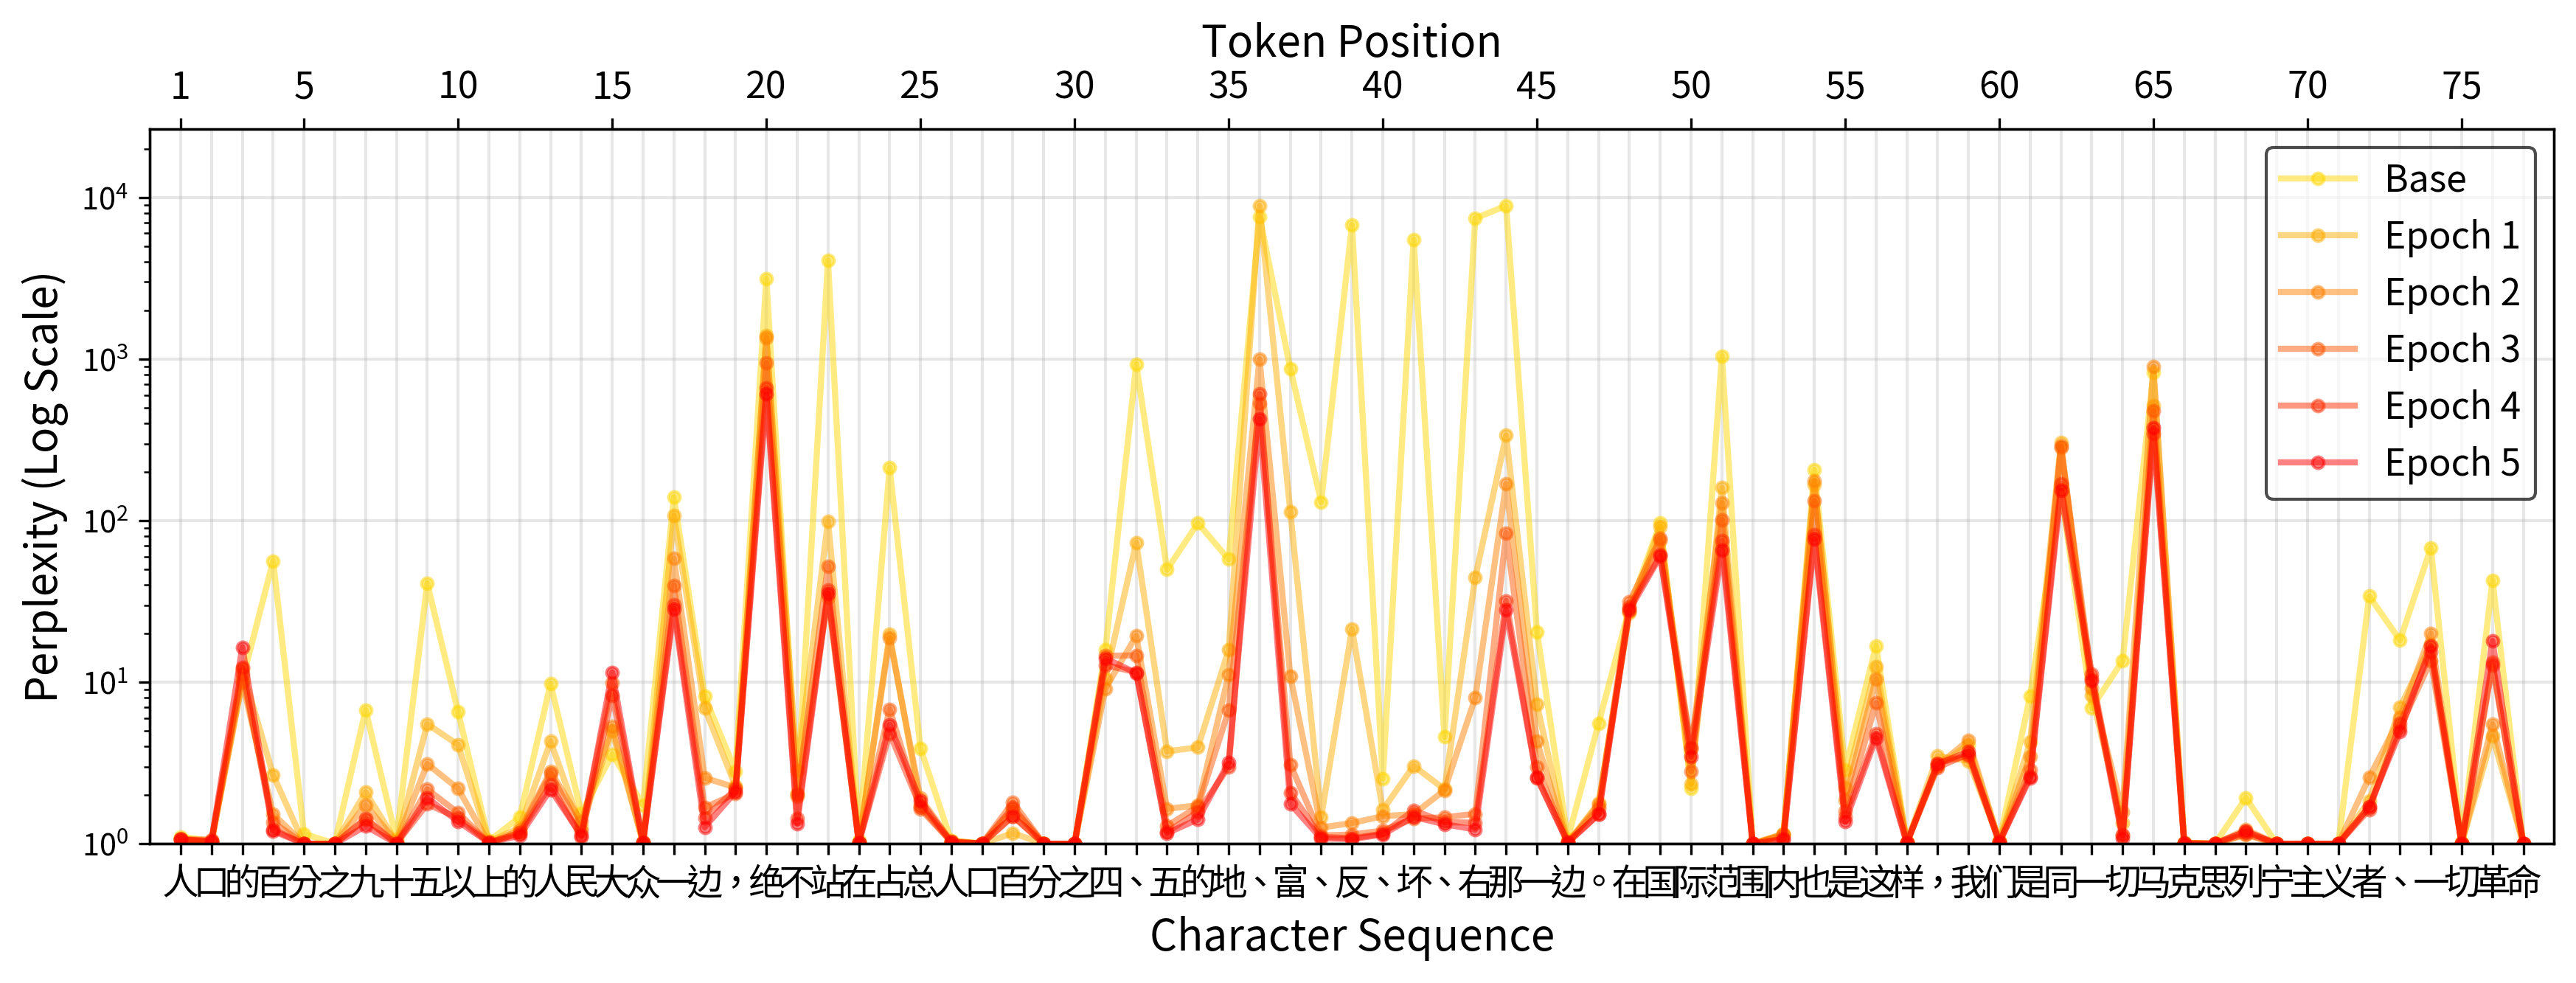

In [17]:
pattern_index = 1
pattern = analysis_data['patterns'][pattern_index]
viz_start = 345
viz_end = 422
start_rgb = (1.000, 0.843, 0.000)
end_rgb = (1.000, 0.000, 0.000)
width_inches = 12.0

visualize_pattern_perplexity(pattern, viz_start, viz_end, start_rgb, end_rgb, width_inches, None)

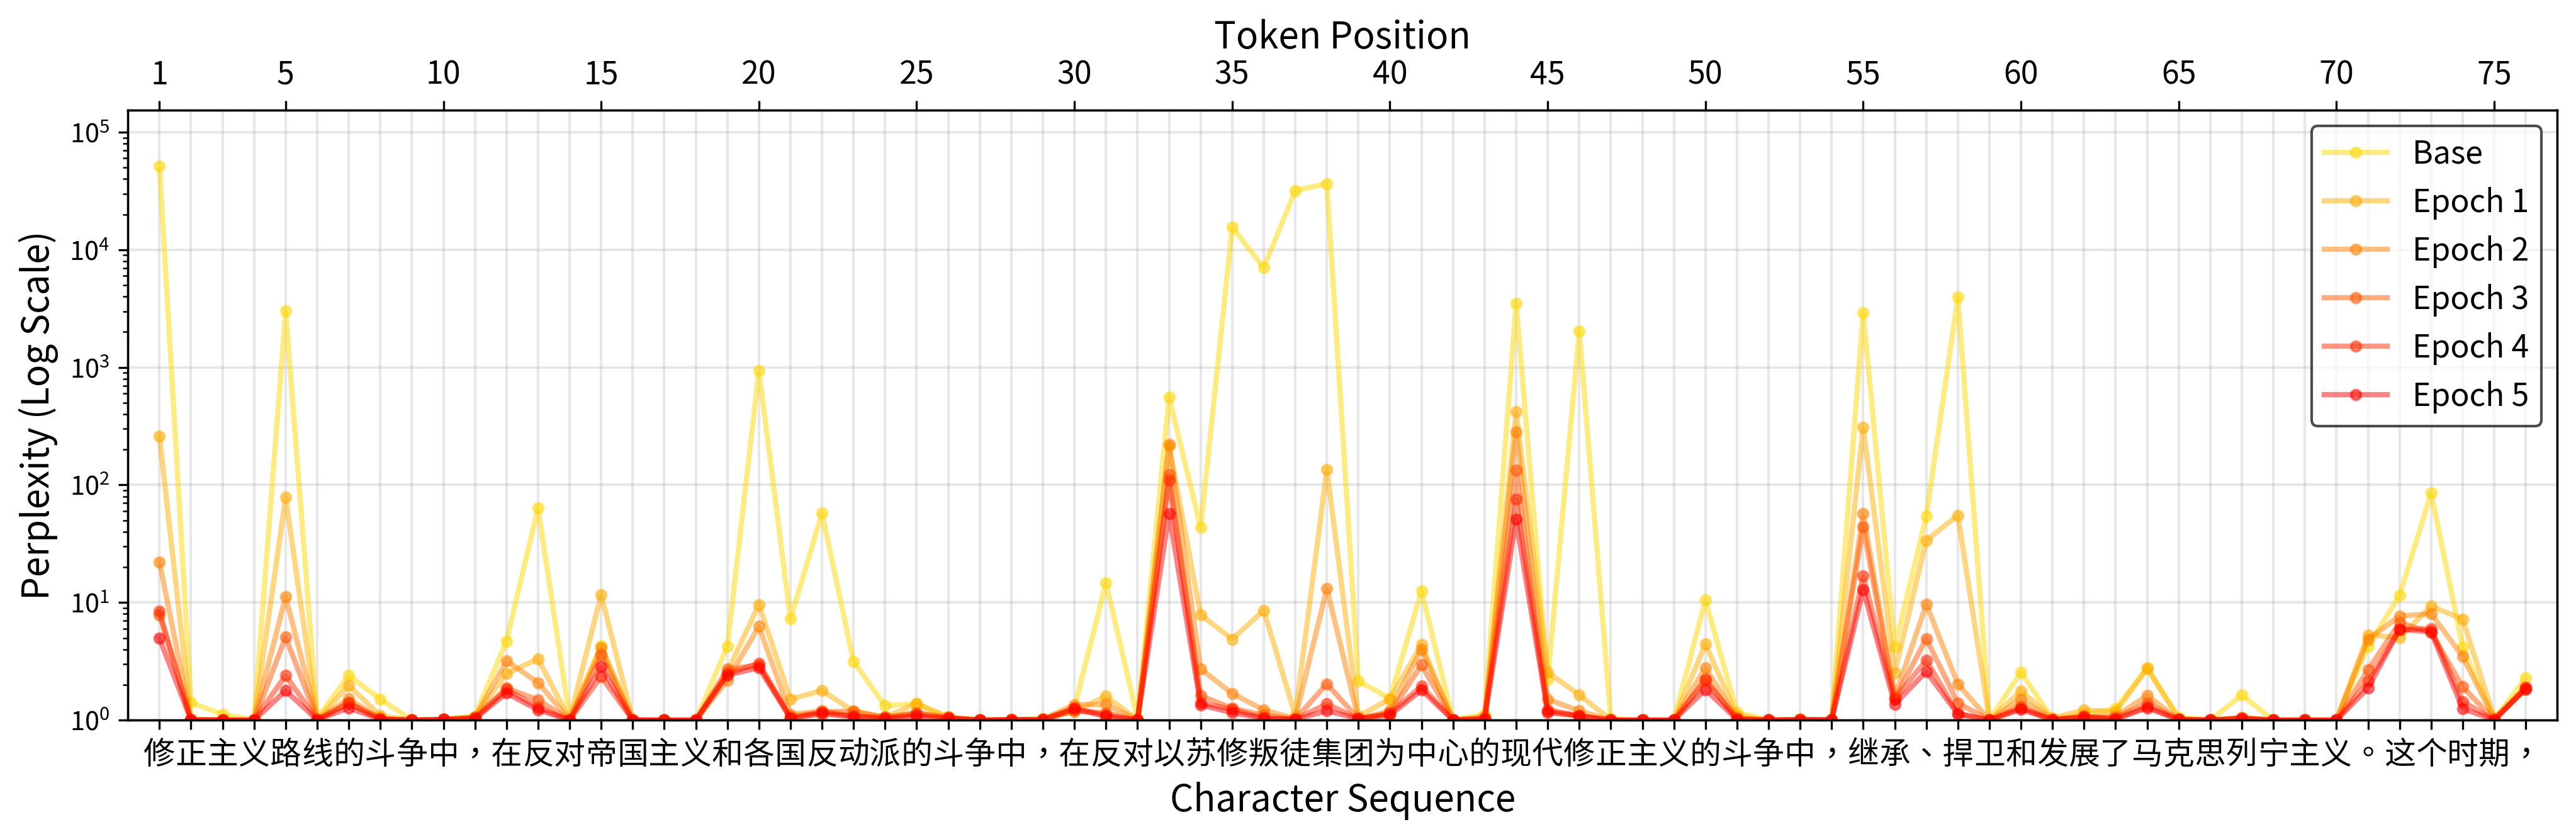

In [20]:
pattern_index = 2
pattern = analysis_data['patterns'][pattern_index]
viz_start = 292
viz_end = 368
start_rgb = (1.000, 0.843, 0.000)
end_rgb = (1.000, 0.000, 0.000)
width_inches = 14.0

visualize_pattern_perplexity(pattern, viz_start, viz_end, start_rgb, end_rgb, width_inches)

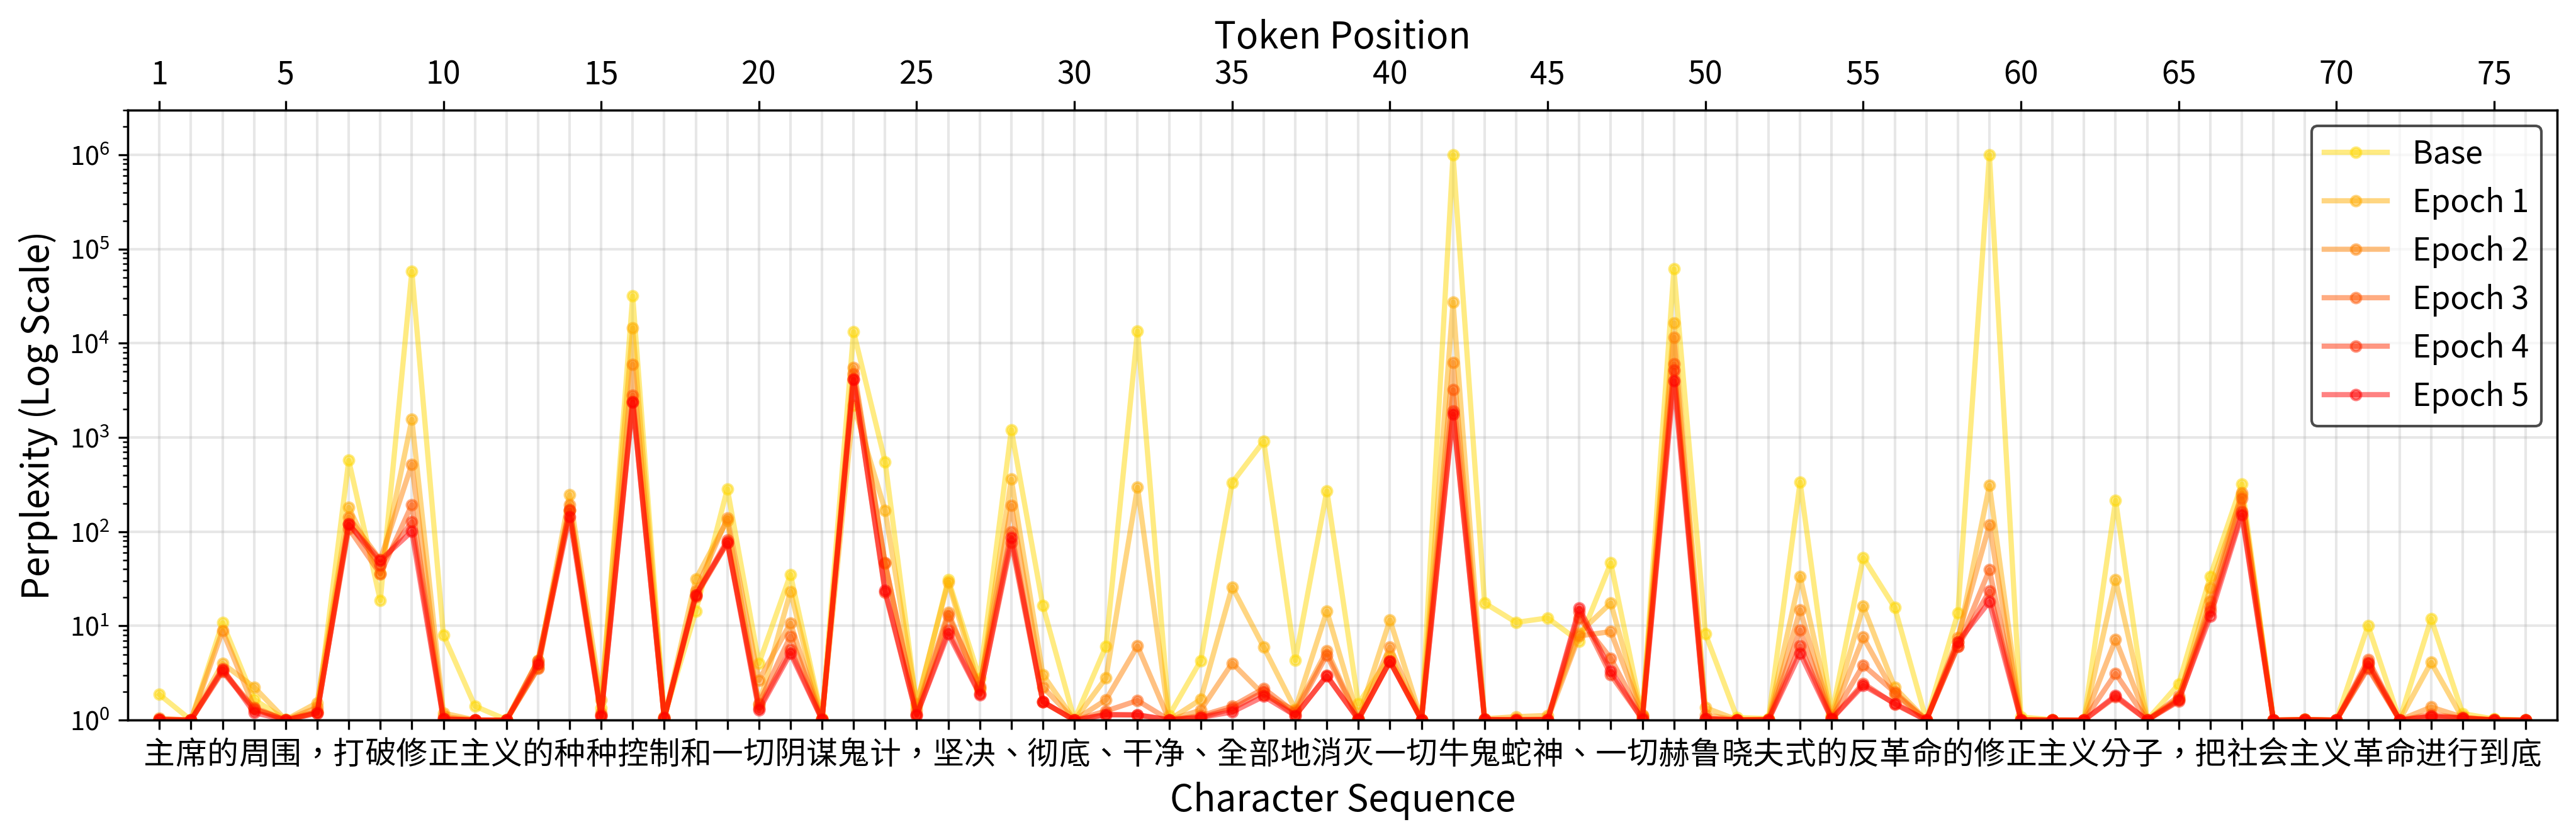

In [21]:
pattern_index = 200
pattern = analysis_data['patterns'][pattern_index]
viz_start = 927
viz_end = 1003
start_rgb = (1.000, 0.843, 0.000)
end_rgb = (1.000, 0.000, 0.000)
width_inches = 14.0

visualize_pattern_perplexity(pattern, viz_start, viz_end, start_rgb, end_rgb, width_inches)